In [364]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [365]:
def show_image(window_name, image, cmap=None):
    if image is None:
        print(f"{window_name}: imagem nao carregada (None)")
        return

    if len(image.shape) == 3 and image.shape[2] == 3:
        img_disp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        img_disp = image
        if cmap is None:
            cmap = 'gray'
    plt.figure(figsize=(8, 6))
    plt.title(window_name)
    plt.axis('off')
    plt.imshow(img_disp, cmap=cmap)
    plt.show()

def close_all_windows():
    pass

In [366]:
MIN_AREA = 300
MAX_AREA = 750

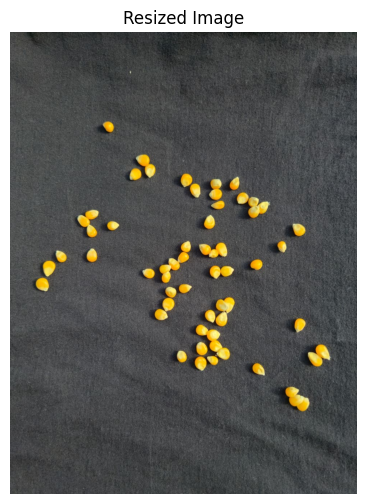

In [367]:
img = cv2.imread('imagens/agrupado3.jpg')
craped_img = img.copy()
# img = cv2.resize(img, (600, 800))
show_image("Resized Image", img)

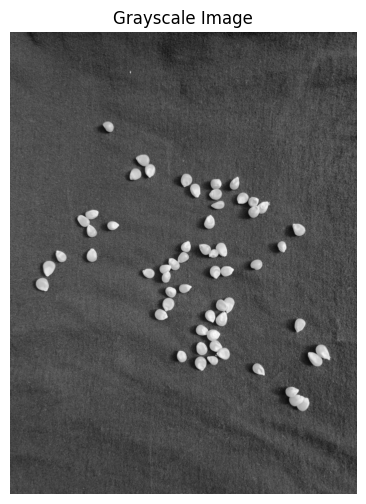

In [368]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray)

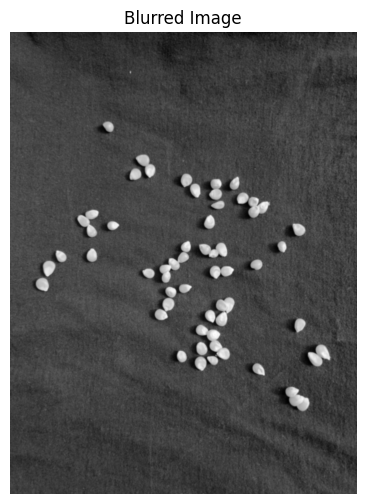

In [369]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
show_image("Blurred Image", blur)

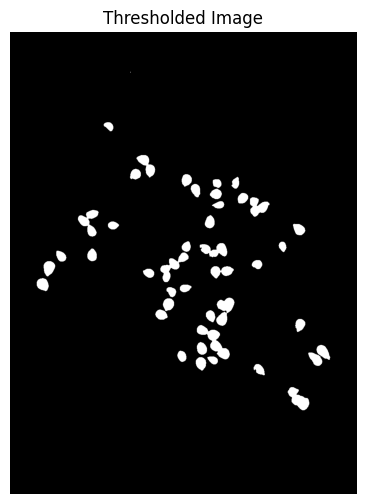

In [370]:
_, thresh = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
show_image("Thresholded Image", thresh)

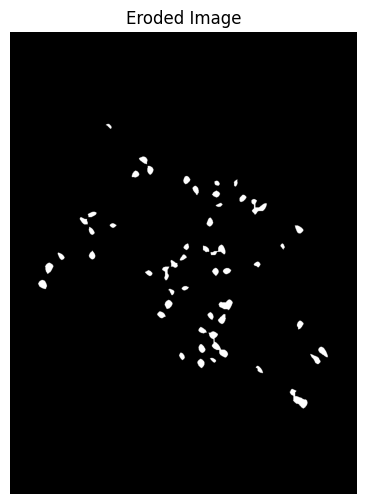

In [371]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
eroded = cv2.erode(thresh, kernel, iterations=1)

show_image("Eroded Image", eroded)

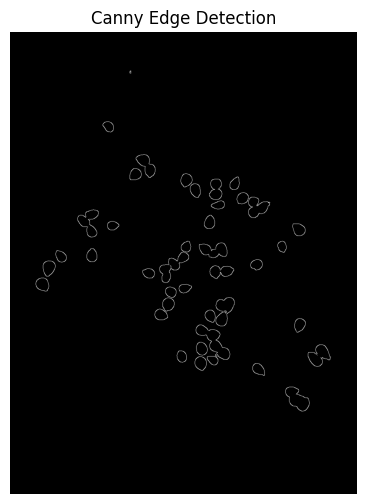

In [372]:
canny1 = cv2.Canny(blur, 160, 200)

show_image("Canny Edge Detection", canny1)

Objetos detectados: 51


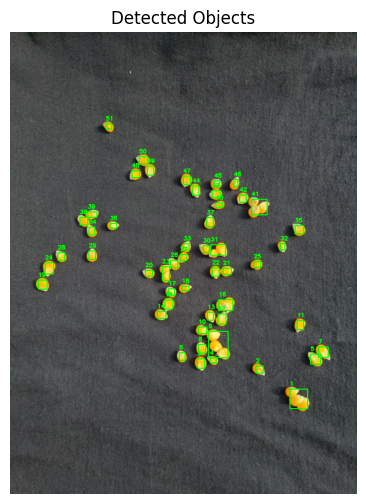

In [373]:
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    cv2.putText(img, f"{i+1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
print("Objetos detectados:", len(contours))
show_image("Detected Objects", img)

In [374]:
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    grain = craped_img[y:y+h, x:x+w]
    
    hsv = cv2.cvtColor(grain, cv2.COLOR_BGR2HSV)
    h_mean = np.mean(hsv[:, :, 0])
    s_mean = np.mean(hsv[:, :, 1])
    v_mean = np.mean(hsv[:, :, 2])
    
    print(f"Objeto {i+1}: x={x}, y={y}, w={w}, h={h}, area={w*h}")
    print(f"Média HSV: H={h_mean:.2f}, S={s_mean:.2f}, V={v_mean:.2f}")
    # show_image(f"Objeto {i+1}", grain)

Objeto 1: x=774, y=989, w=49, h=54, area=2646
Média HSV: H=34.51, S=159.39, V=189.46
Objeto 2: x=680, y=925, w=20, h=20, area=400
Média HSV: H=23.62, S=194.22, V=234.21
Objeto 3: x=518, y=905, w=20, h=26, area=520
Média HSV: H=24.01, S=210.33, V=247.83
Objeto 4: x=553, y=903, w=17, h=13, area=221
Média HSV: H=24.52, S=209.87, V=240.57
Objeto 5: x=831, y=892, w=28, h=28, area=784
Média HSV: H=23.85, S=194.37, V=231.82
Objeto 6: x=468, y=888, w=16, h=21, area=336
Média HSV: H=25.03, S=154.76, V=241.04
Objeto 7: x=853, y=872, w=27, h=29, area=783
Média HSV: H=24.28, S=189.21, V=238.77
Objeto 8: x=521, y=865, w=20, h=24, area=480
Média HSV: H=23.43, S=210.80, V=249.15
Objeto 9: x=549, y=829, w=54, h=73, area=3942
Média HSV: H=40.96, S=142.87, V=176.05
Objeto 10: x=521, y=817, w=23, h=18, area=414
Média HSV: H=24.75, S=199.76, V=247.54
Objeto 11: x=794, y=799, w=18, h=25, area=450
Média HSV: H=23.81, S=226.02, V=248.40
Objeto 12: x=575, y=781, w=22, h=28, area=616
Média HSV: H=24.30, S=173.